In [1]:
import sys
import os
sys.path.append(os.path.abspath('../VITAL/eval_utils'))
from eval_attributes import *

# Trend

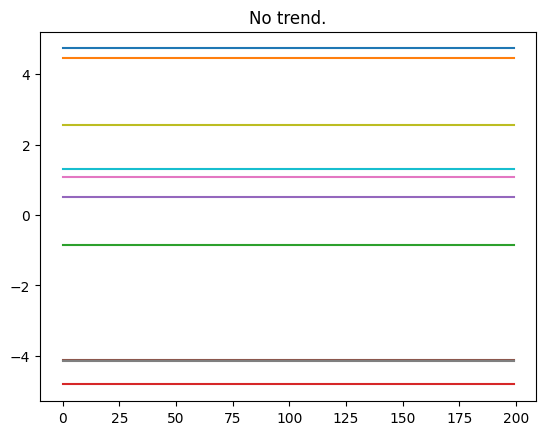

/Users/joyqiu/Documents/Documents JoyQiu Work/Research/LLMTimeSeries/llm_nicu_vitalsigns/script/VITAL/eval_utils/eval_attributes.py:239: RuntimeWarning: invalid value encountered in divide
  P /= P.sum()


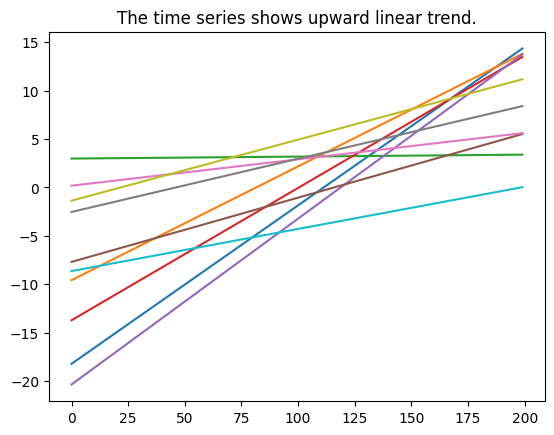

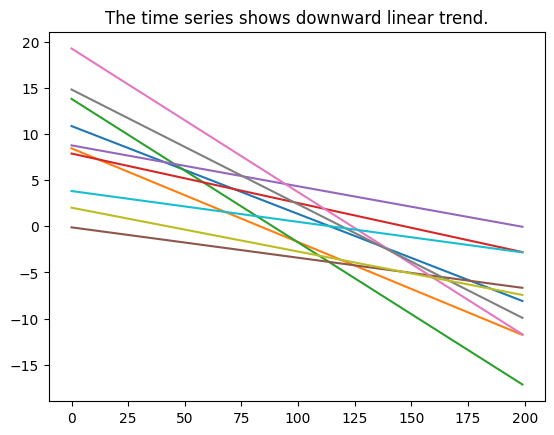

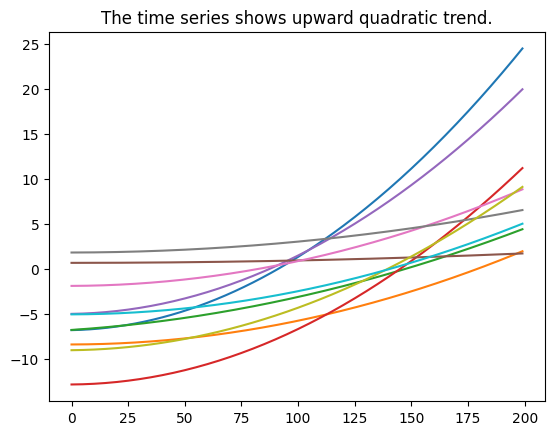

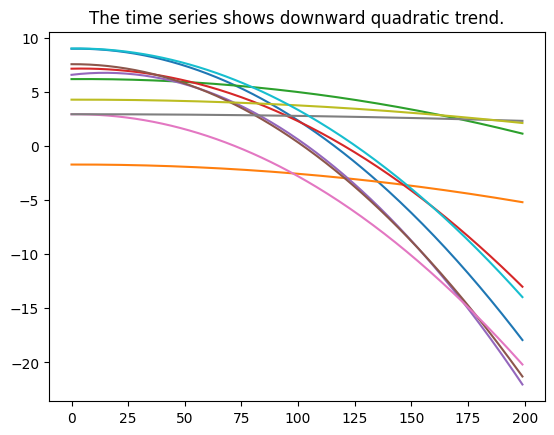

flat: [0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0]
linear_up: [0.16, 0.12, 0.0, 0.14, 0.17, 0.07, 0.03, 0.06, 0.06, 0.04]
linear_down: [-0.1, -0.1, -0.16, -0.05, -0.04, -0.03, -0.16, -0.12, -0.05, -0.03]
quadratic_up: [0.16, 0.05, 0.06, 0.12, 0.13, 0.01, 0.05, 0.02, 0.09, 0.05]
quadratic_down: [-0.14, -0.02, -0.03, -0.1, -0.14, -0.15, -0.12, -0.0, -0.01, -0.12]


In [2]:
from trend import *
ev_all = {}

ts_ls, txt_ls = generate_trend_series(10, 200, trend_type='flat')
# plot the series list
for i in range(len(ts_ls)):
    plt.plot(ts_ls[i])
plt.title(txt_ls[i])
plt.show()
# eval the math properties of the series
ev_all['flat'] = []
for i in range(len(ts_ls)):
    ev_all['flat'].append(np.round(get_all_properties(ts_ls[i])['trend'], 2))

ts_ls, txt_ls = generate_trend_series(10, 200, trend_type='linear', direction='up')
# plot the series list
for i in range(len(ts_ls)):
    plt.plot(ts_ls[i])
plt.title(txt_ls[i])
plt.show()
# eval the math properties of the series
ev_all['linear_up'] = []
for i in range(len(ts_ls)):
    ev_all['linear_up'].append(np.round(get_all_properties(ts_ls[i])['trend'], 2))


ts_ls, txt_ls = generate_trend_series(10, 200, trend_type='linear', direction='down')
# plot the series list
for i in range(len(ts_ls)):
    plt.plot(ts_ls[i])
plt.title(txt_ls[i])
plt.show()
# eval the math properties of the series
ev_all['linear_down'] = []
for i in range(len(ts_ls)):
    ev_all['linear_down'].append(np.round(get_all_properties(ts_ls[i])['trend'], 2))


ts_ls, txt_ls = generate_trend_series(10, 200, trend_type='quadratic', direction='up')
# plot the series list
for i in range(len(ts_ls)):
    plt.plot(ts_ls[i])
plt.title(txt_ls[i])
plt.show()
# eval the math properties of the series
ev_all['quadratic_up'] = []
for i in range(len(ts_ls)):
    ev_all['quadratic_up'].append(np.round(get_all_properties(ts_ls[i])['trend'], 2))

ts_ls, txt_ls = generate_trend_series(10, 200, trend_type='quadratic', direction='down')
# plot the series list
for i in range(len(ts_ls)):
    plt.plot(ts_ls[i])
plt.title(txt_ls[i])
plt.show()
# eval the math properties of the series
ev_all['quadratic_down'] = []
for i in range(len(ts_ls)):
    ev_all['quadratic_down'].append(np.round(get_all_properties(ts_ls[i])['trend'], 2))


# nice print dictionary
for key, value in ev_all.items():
    print(f"{key}: {value}")

# Seasonality

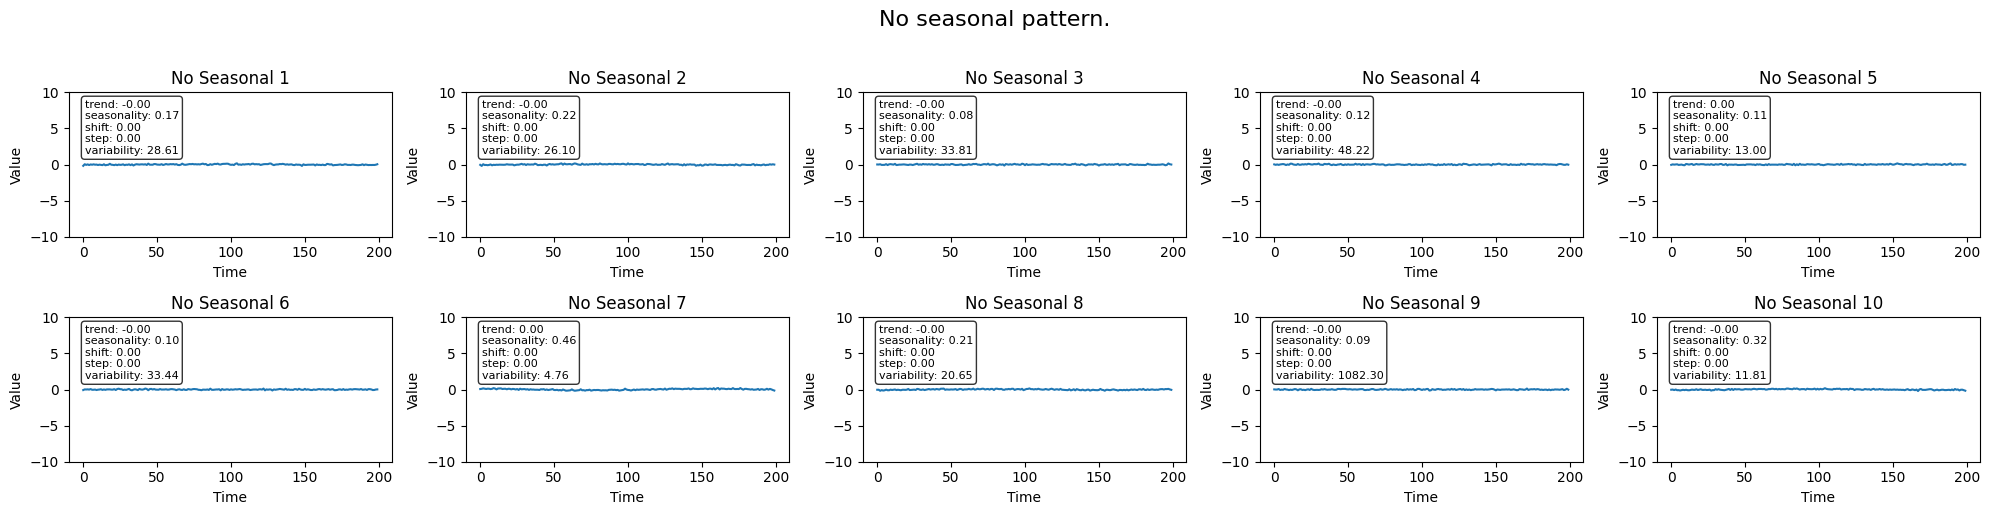

/Users/joyqiu/Documents/Documents JoyQiu Work/Research/LLMTimeSeries/llm_nicu_vitalsigns/script/VITAL/eval_utils/eval_attributes.py:299: RuntimeWarning: Mean of empty slice.
  mean_right  = x[right:].mean()
/Users/joyqiu/Documents/Documents JoyQiu Work/Research/LLMTimeSeries/llm_nicu_vitalsigns/clip_env/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


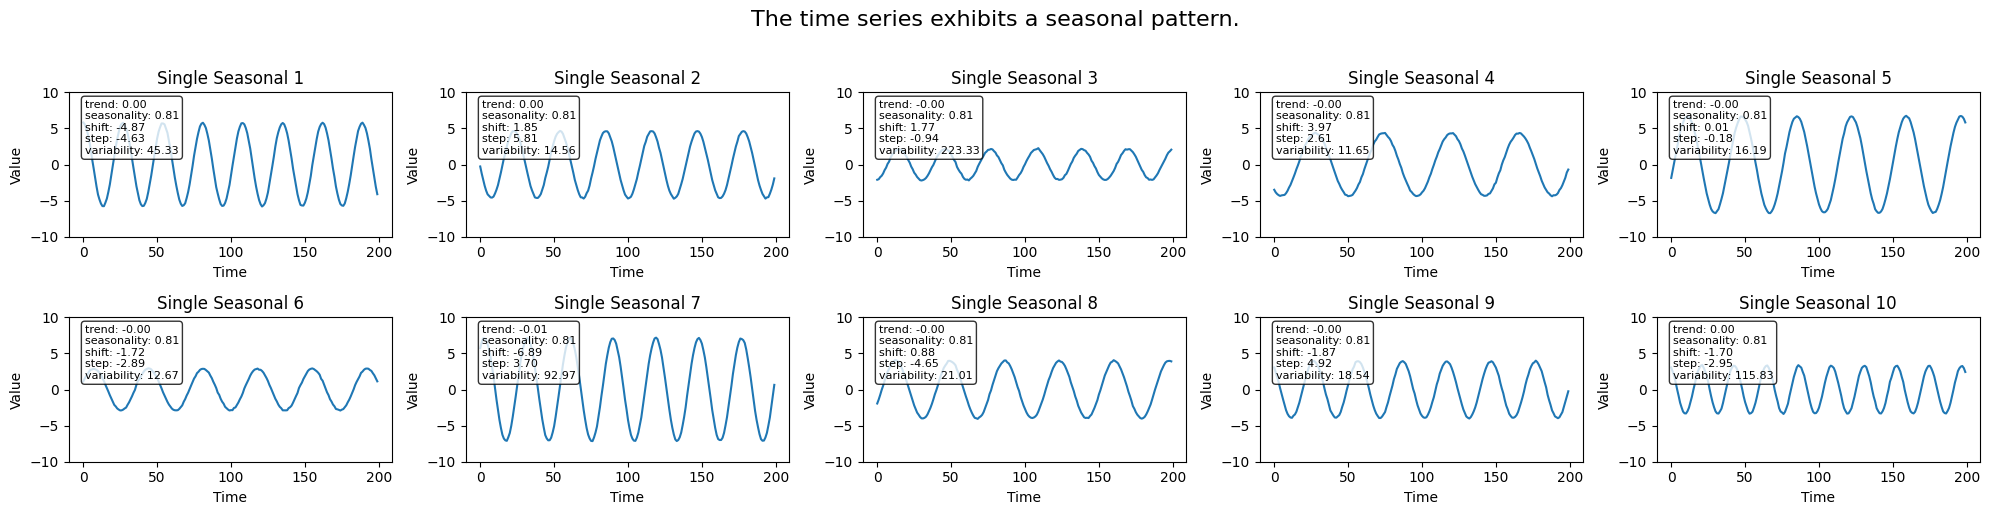

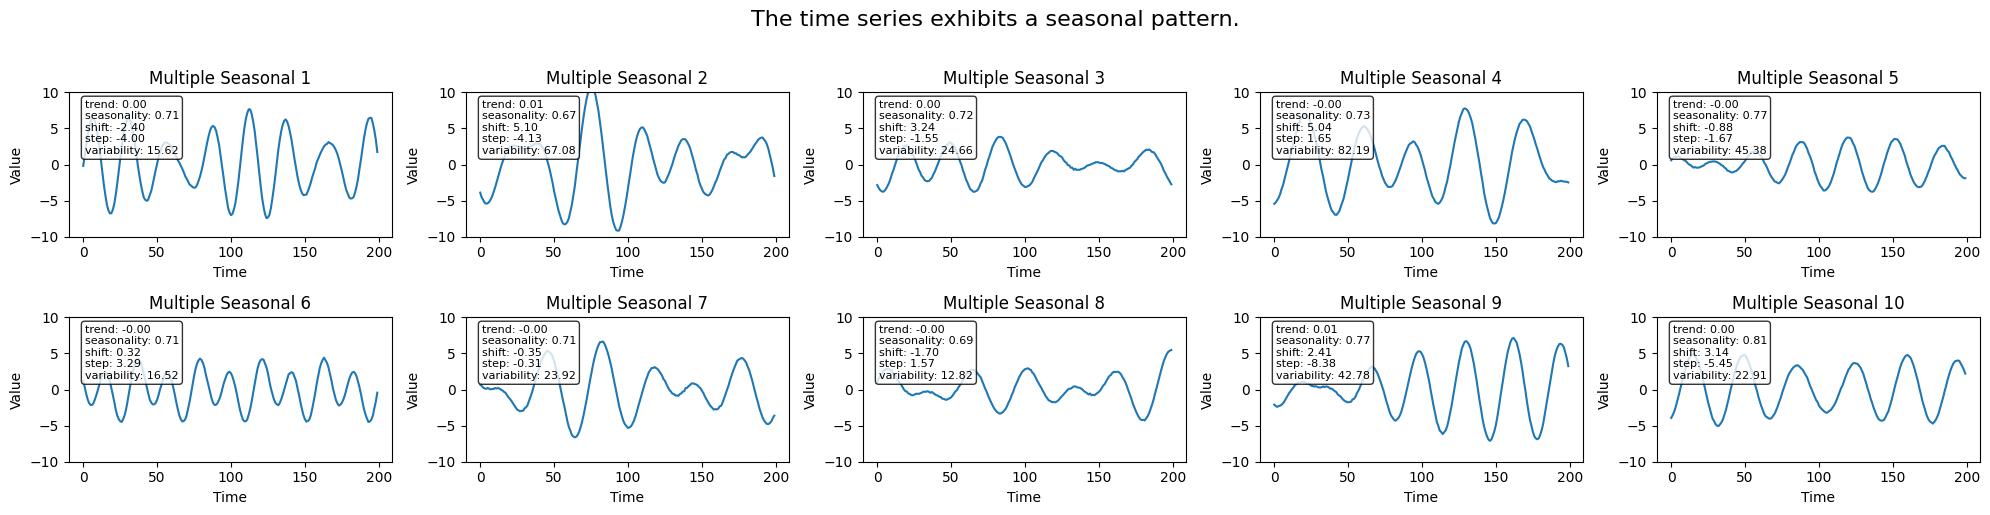

In [6]:
from seasonality import *
import matplotlib.pyplot as plt

# Generate example series for each seasonal type
n_series = 10  # Reduced number of series for better visualization
length = 200

# No seasonal pattern
no_series, no_descriptions = generate_seasonal_series(
    n_series, length, 'no')

# Single seasonal pattern
single_series, single_descriptions = generate_seasonal_series(
    n_series, length, 'single')

# Multiple seasonal patterns
multiple_series, multiple_descriptions = generate_seasonal_series(
    n_series, length, 'multiple')



# # Print results
# print("\nSeasonality Scores Summary:")
# print("=" * 60)
# for pattern, scores_list in ev_all.items():
#     print(f"\n{pattern.upper()} PATTERN:")
#     print("-" * 30)
#     for i, scores in enumerate(scores_list):
#         print(f"\nSeries {i+1}:")
#         print(f"  ACF: {scores['acf']}")
#         print(f"  STL: {scores['stl']}")
#         print(f"  Spectrum: {scores['spectrum']}")
#         print(f"  Entropy: {scores['entropy']}")

    # Create three separate figures for better visualization
# Figure 1: No Seasonal Patterns
plt.figure(figsize=(20, 5))
plt.suptitle(no_descriptions[0], fontsize=16, y=1.02)

# Plot no seasonal patterns in a 2x5 grid
for i, (series, desc) in enumerate(zip(no_series, no_descriptions)):
    plt.subplot(2, 5, i+1)
    plt.plot(series)
    scores = get_all_properties(series, step = True)
    score_text = f"trend: {scores['trend']:.2f}\nseasonality: {scores['seasonality']:.2f}\nshift: {scores['shift']:.2f}\nstep: {scores['step']:.2f}\nvariability: {scores['variability']:.2f}"
    
    plt.text(0.05, 0.95, score_text, transform=plt.gca().transAxes, 
             fontsize=8, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    plt.title(f'No Seasonal {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.ylim(-10, 10)
    plt.tight_layout()

plt.show()

# Figure 2: Single Seasonal Patterns
plt.figure(figsize=(20, 5))
plt.suptitle(single_descriptions[0], fontsize=16, y=1.02)

# Plot single seasonal patterns in a 2x5 grid
for i, (series, desc) in enumerate(zip(single_series, single_descriptions)):
    plt.subplot(2, 5, i+1)
    plt.plot(series)
    scores = get_all_properties(series, step = True)
    score_text = f"trend: {scores['trend']:.2f}\nseasonality: {scores['seasonality']:.2f}\nshift: {scores['shift']:.2f}\nstep: {scores['step']:.2f}\nvariability: {scores['variability']:.2f}"
    
    plt.text(0.05, 0.95, score_text, transform=plt.gca().transAxes, 
             fontsize=8, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    plt.title(f'Single Seasonal {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.ylim(-10, 10)
    plt.tight_layout()

plt.show()

# Figure 3: Multiple Seasonal Patterns
plt.figure(figsize=(20, 5))
plt.suptitle(multiple_descriptions[0], fontsize=16, y=1.02)

# Plot multiple seasonal patterns in a 2x5 grid
for i, (series, desc) in enumerate(zip(multiple_series, multiple_descriptions)):
    plt.subplot(2, 5, i+1)
    plt.plot(series)
    scores = get_all_properties(series, step = True)
    score_text = f"trend: {scores['trend']:.2f}\nseasonality: {scores['seasonality']:.2f}\nshift: {scores['shift']:.2f}\nstep: {scores['step']:.2f}\nvariability: {scores['variability']:.2f}"
    
    plt.text(0.05, 0.95, score_text, transform=plt.gca().transAxes, 
             fontsize=8, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    plt.title(f'Multiple Seasonal {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.ylim(-10, 10)
    plt.tight_layout()

plt.show()

# Step

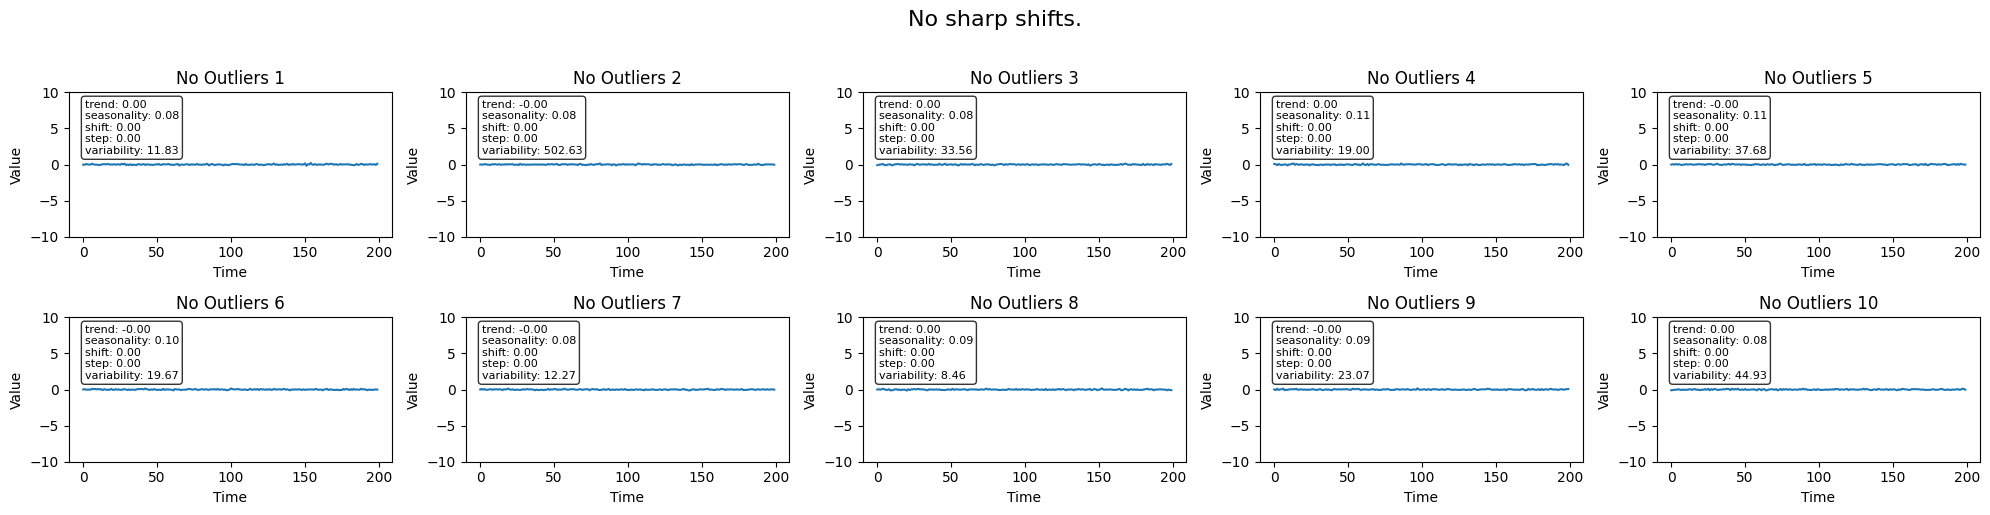

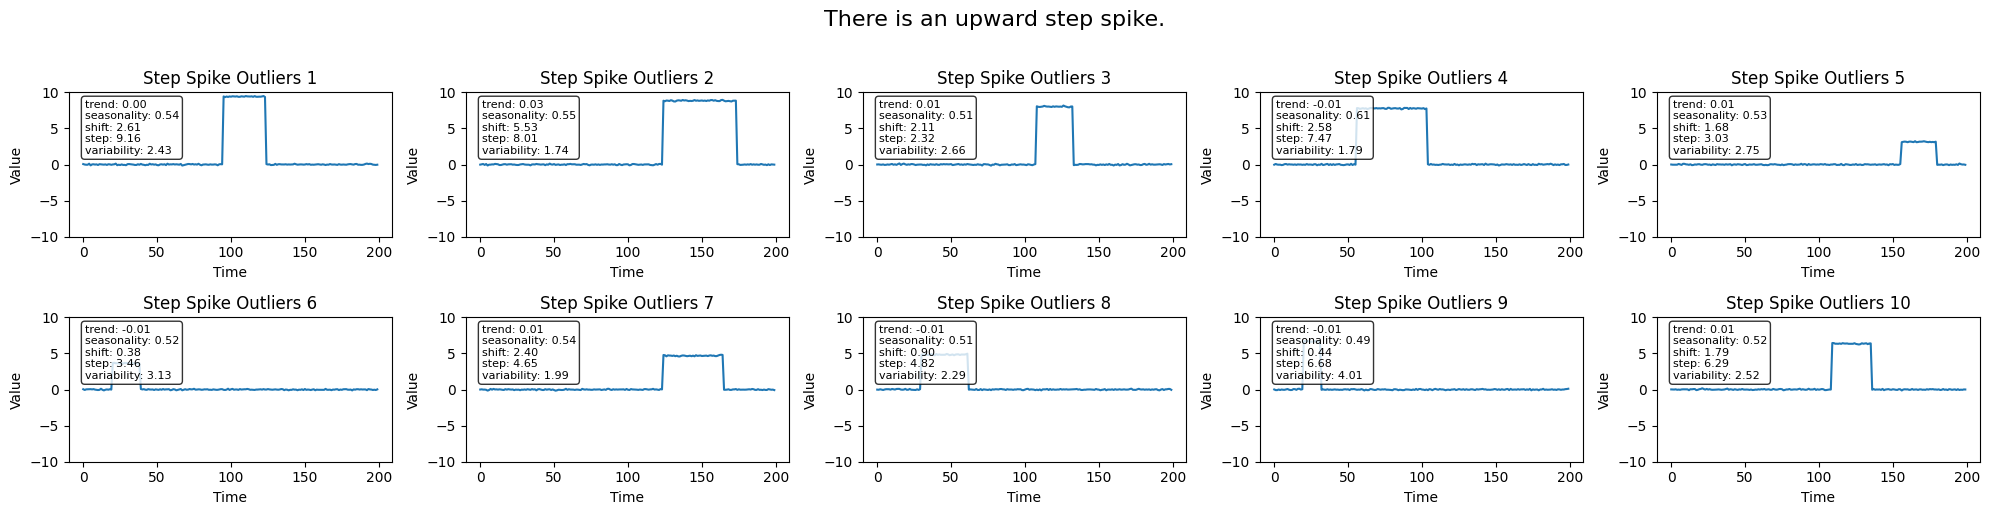

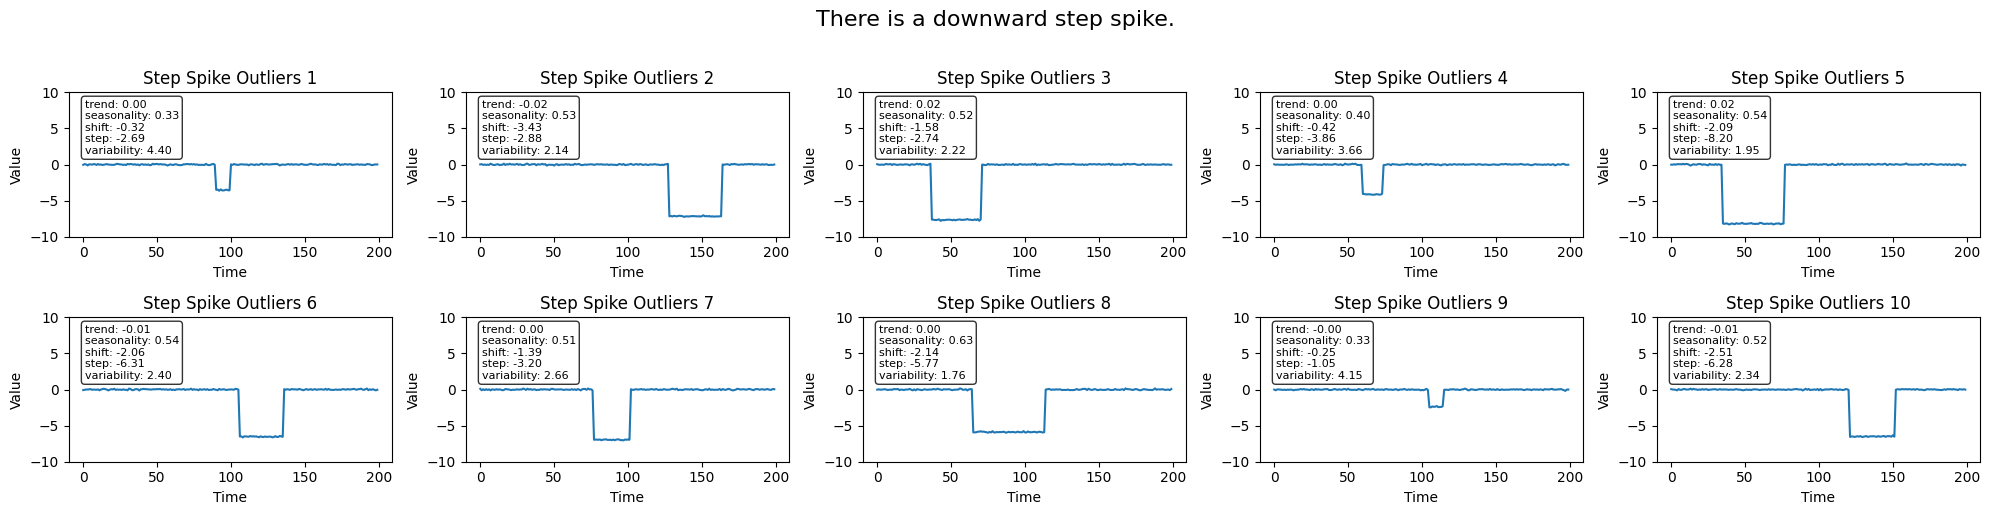

In [7]:
from outlier import *
import matplotlib.pyplot as plt

# Generate example series for each outlier type
n_series = 10  # Reduced number of series for better visualization
length = 200

# No outliers
no_series, no_descriptions = generate_outlier_series(
    n_series, length, 'no')

# # Spike outliers
# spike_series, spike_descriptions = generate_outlier_series(
#     n_series, length, 'spikes')

# Step spike outliers
step_series_up, step_descriptions_up = generate_outlier_series(
    n_series, length, 'step_spike_up')
step_series_down, step_descriptions_down = generate_outlier_series(
    n_series, length, 'step_spike_down')

# Create four separate figures for better visualization
# Figure 1: No Outliers
plt.figure(figsize=(20, 5))
plt.suptitle(no_descriptions[0], fontsize=16, y=1.02)

# Plot no outlier patterns in a 2x5 grid
for i, (series, desc) in enumerate(zip(no_series, no_descriptions)):
    plt.subplot(2, 5, i+1)
    plt.plot(series)
    scores = get_all_properties(series, step = True)
    score_text = f"trend: {scores['trend']:.2f}\nseasonality: {scores['seasonality']:.2f}\nshift: {scores['shift']:.2f}\nstep: {scores['step']:.2f}\nvariability: {scores['variability']:.2f}"
    
    plt.text(0.05, 0.95, score_text, transform=plt.gca().transAxes, 
             fontsize=8, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.title(f'No Outliers {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.ylim(-10, 10)
    plt.tight_layout()

plt.show()

# # Figure 2: Spike Outliers
# plt.figure(figsize=(20, 5))
# plt.suptitle(spike_descriptions[0], fontsize=16, y=1.02)

# # Plot spike outlier patterns in a 2x5 grid
# for i, (series, desc) in enumerate(zip(spike_series, spike_descriptions)):
#     plt.subplot(2, 5, i+1)
#     plt.plot(series)
#     scores = get_all_properties(series)['shift']
#     score_text = f"cusum_range: {scores['cusum_range']:.2f}\nrolling_mean_shift: {scores['rolling_mean_shift']:.2f}"
    
#     plt.text(0.05, 0.95, score_text, transform=plt.gca().transAxes, 
#              fontsize=8, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
#     plt.title(f'Spike Outliers {i+1}')
#     plt.xlabel('Time')
#     plt.ylabel('Value')
#     plt.ylim(-10, 10)
#     plt.tight_layout()

# plt.show()

# Figure 3: Step Spike Outliers
plt.figure(figsize=(20, 5))
plt.suptitle(step_descriptions_up[0], fontsize=16, y=1.02)

# Plot step spike outlier patterns in a 2x5 grid
for i, (series, desc) in enumerate(zip(step_series_up, step_descriptions_up)):
    plt.subplot(2, 5, i+1)
    plt.plot(series)
    scores = get_all_properties(series, step = True)
    score_text = f"trend: {scores['trend']:.2f}\nseasonality: {scores['seasonality']:.2f}\nshift: {scores['shift']:.2f}\nstep: {scores['step']:.2f}\nvariability: {scores['variability']:.2f}"
    
    plt.text(0.05, 0.95, score_text, transform=plt.gca().transAxes, 
             fontsize=8, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    plt.title(f'Step Spike Outliers {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.ylim(-10, 10)
    plt.tight_layout()

plt.show()

plt.figure(figsize=(20, 5))
plt.suptitle(step_descriptions_down[0], fontsize=16, y=1.02)

# Plot step spike outlier patterns in a 2x5 grid
for i, (series, desc) in enumerate(zip(step_series_down, step_descriptions_down)):
    plt.subplot(2, 5, i+1)
    plt.plot(series)
    scores = get_all_properties(series, step = True)
    score_text = f"trend: {scores['trend']:.2f}\nseasonality: {scores['seasonality']:.2f}\nshift: {scores['shift']:.2f}\nstep: {scores['step']:.2f}\nvariability: {scores['variability']:.2f}"
    
    plt.text(0.05, 0.95, score_text, transform=plt.gca().transAxes, 
             fontsize=8, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    plt.title(f'Step Spike Outliers {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.ylim(-10, 10)
    plt.tight_layout()

plt.show()


# Shift

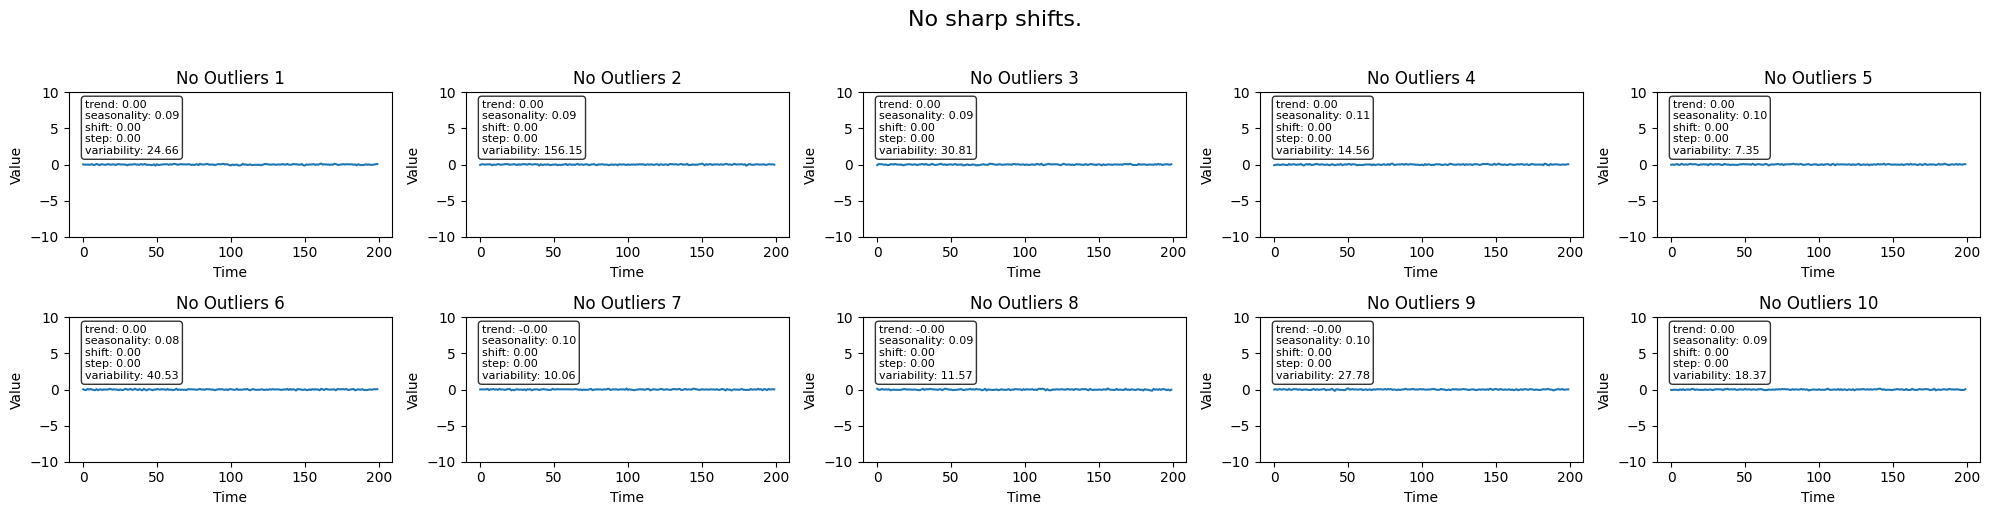

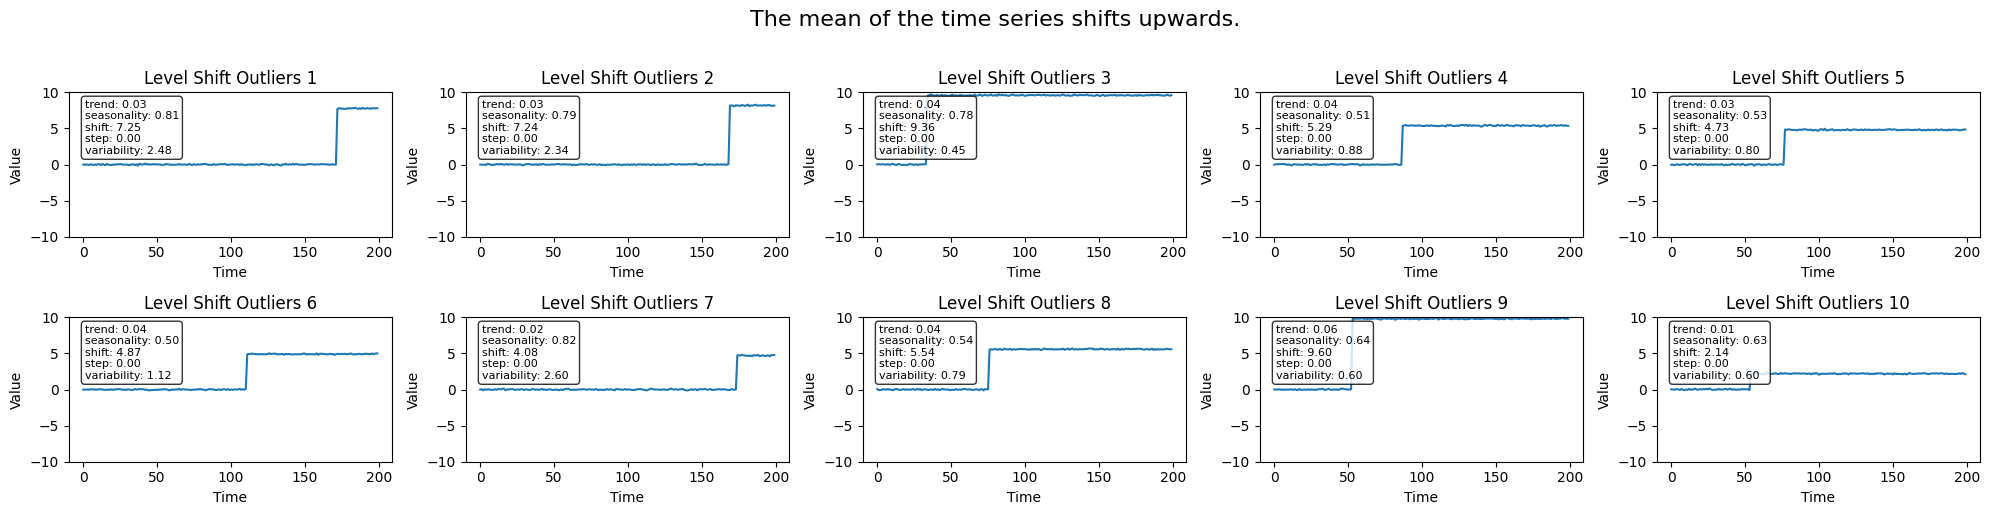

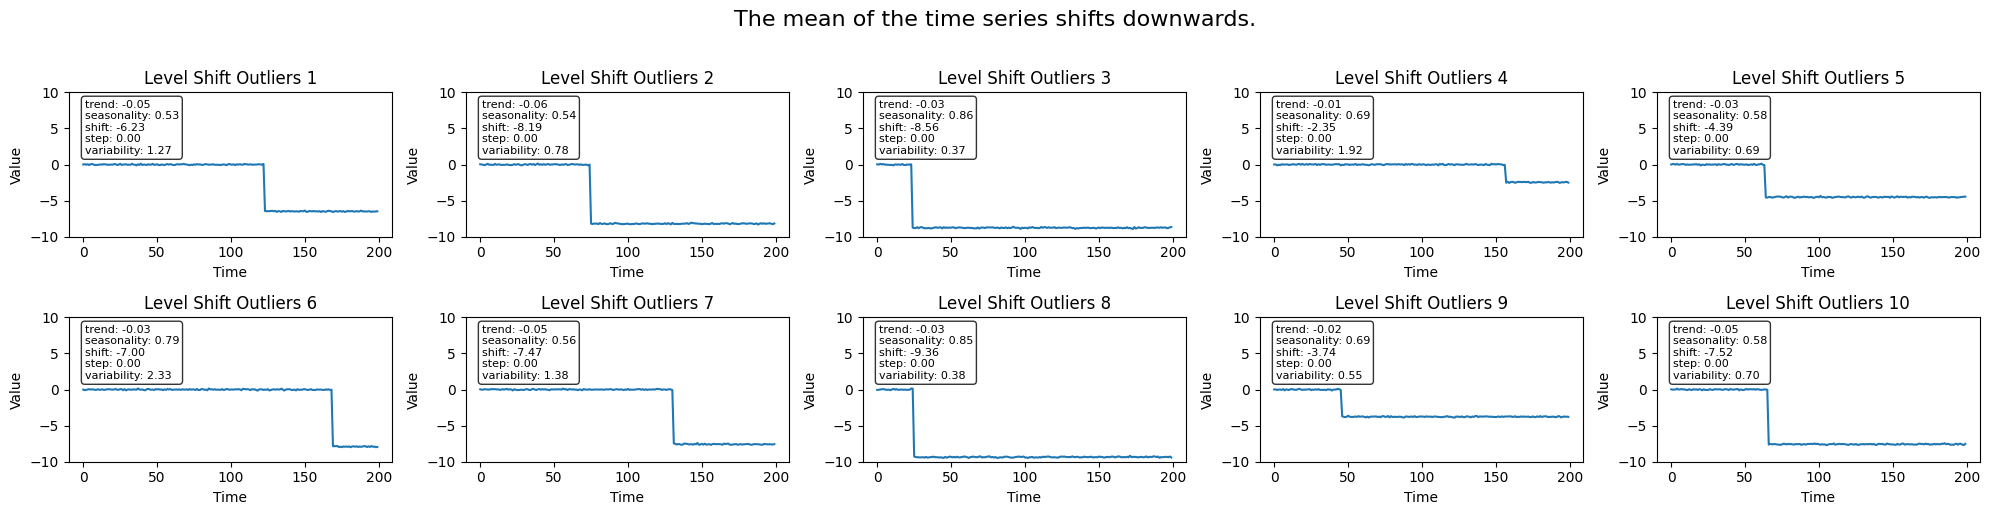

In [8]:
from outlier import *
import matplotlib.pyplot as plt

# Generate example series for each outlier type
n_series = 10  # Reduced number of series for better visualization
length = 200

# No outliers
no_series, no_descriptions = generate_outlier_series(
    n_series, length, 'no')

# Level shift outliers
level_series_up, level_descriptions_up = generate_outlier_series(
    n_series, length, 'level_shift_up')
level_series_down, level_descriptions_down = generate_outlier_series(
    n_series, length, 'level_shift_down')

# Create four separate figures for better visualization
# Figure 1: No Outliers
plt.figure(figsize=(20, 5))
plt.suptitle(no_descriptions[0], fontsize=16, y=1.02)

# Plot no outlier patterns in a 2x5 grid
for i, (series, desc) in enumerate(zip(no_series, no_descriptions)):
    plt.subplot(2, 5, i+1)
    plt.plot(series)
    # scores = get_all_properties(series, step = True)
    # score_shift = scores['shift']
    # score_step = scores['step']
    # score_text = f"shift_pelt: {score_shift:.2f}\nstep_pelt: {score_step:.2f}"
    scores = get_all_properties(series, step = True)
    score_text = f"trend: {scores['trend']:.2f}\nseasonality: {scores['seasonality']:.2f}\nshift: {scores['shift']:.2f}\nstep: {scores['step']:.2f}\nvariability: {scores['variability']:.2f}"
    
    plt.text(0.05, 0.95, score_text, transform=plt.gca().transAxes, 
             fontsize=8, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    plt.title(f'No Outliers {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.ylim(-10, 10)
    plt.tight_layout()

plt.show()


# Figure 4: Level Shift Outliers
plt.figure(figsize=(20, 5))
plt.suptitle(level_descriptions_up[0], fontsize=16, y=1.02)

# Plot level shift outlier patterns in a 2x5 grid
for i, (series, desc) in enumerate(zip(level_series_up, level_descriptions_up)):
    plt.subplot(2, 5, i+1)
    plt.plot(series)
    scores = get_all_properties(series, step = True)
    score_text = f"trend: {scores['trend']:.2f}\nseasonality: {scores['seasonality']:.2f}\nshift: {scores['shift']:.2f}\nstep: {scores['step']:.2f}\nvariability: {scores['variability']:.2f}"
    plt.text(0.05, 0.95, score_text, transform=plt.gca().transAxes, 
             fontsize=8, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    plt.title(f'Level Shift Outliers {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.ylim(-10, 10)
    plt.tight_layout()

plt.show()

plt.figure(figsize=(20, 5))
plt.suptitle(level_descriptions_down[0], fontsize=16, y=1.02)

# Plot level shift outlier patterns in a 2x5 grid
for i, (series, desc) in enumerate(zip(level_series_down, level_descriptions_down)):
    plt.subplot(2, 5, i+1)
    plt.plot(series)
    scores = get_all_properties(series, step = True)
    score_text = f"trend: {scores['trend']:.2f}\nseasonality: {scores['seasonality']:.2f}\nshift: {scores['shift']:.2f}\nstep: {scores['step']:.2f}\nvariability: {scores['variability']:.2f}"
    
    plt.text(0.05, 0.95, score_text, transform=plt.gca().transAxes, 
             fontsize=8, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    plt.title(f'Level Shift Outliers {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.ylim(-10, 10)
    plt.tight_layout()

plt.show()

# Seasonal + Shift

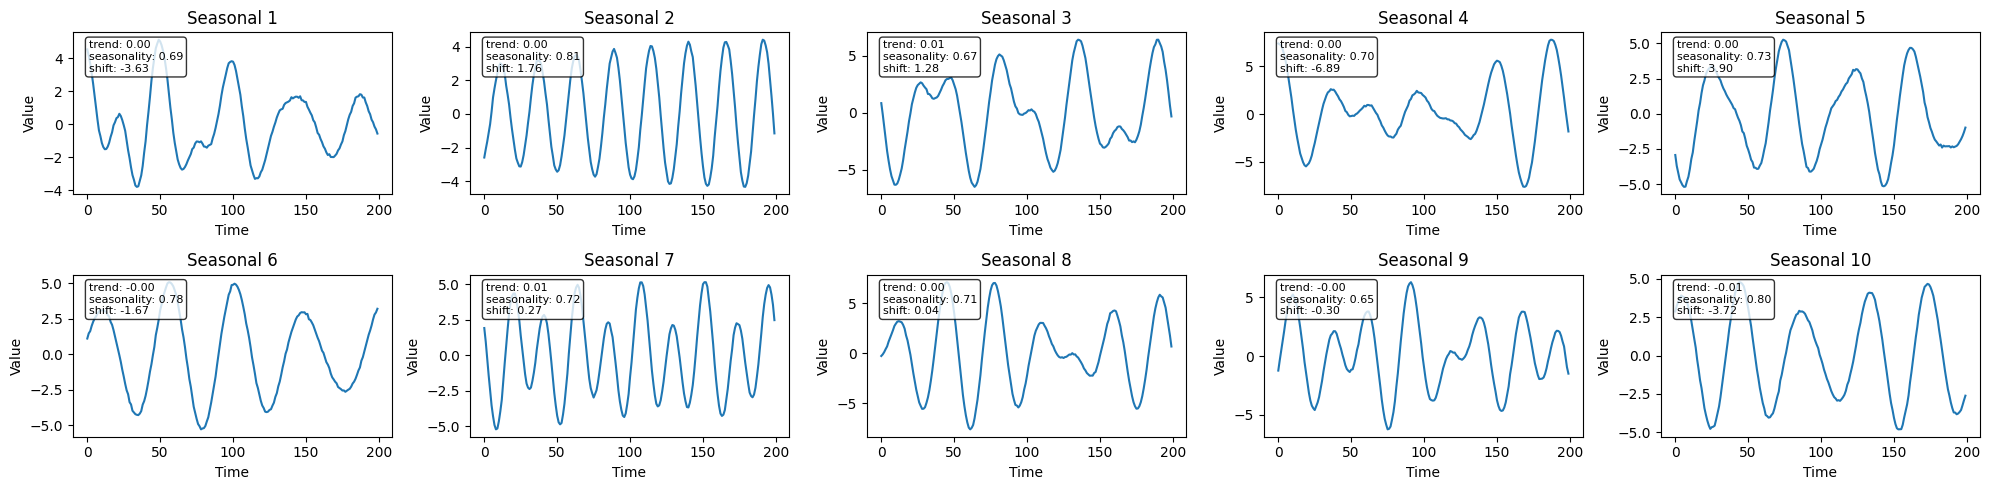

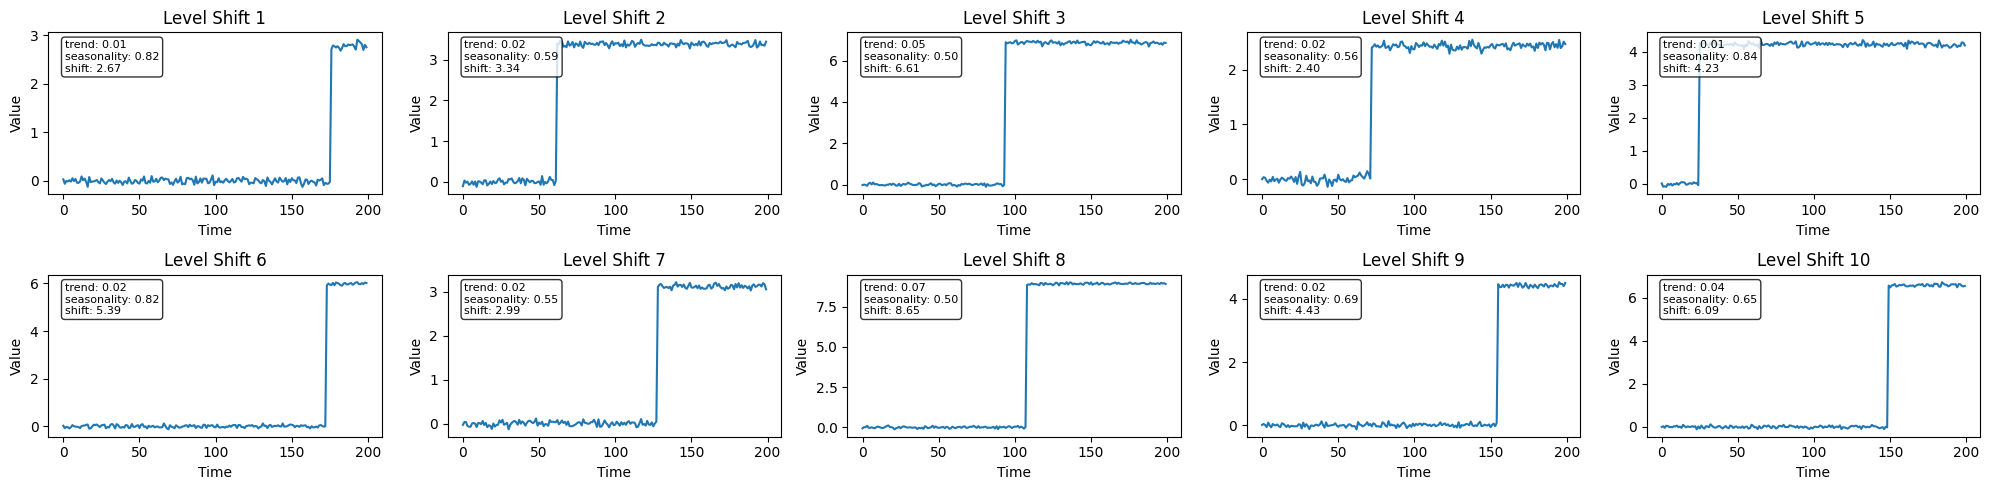

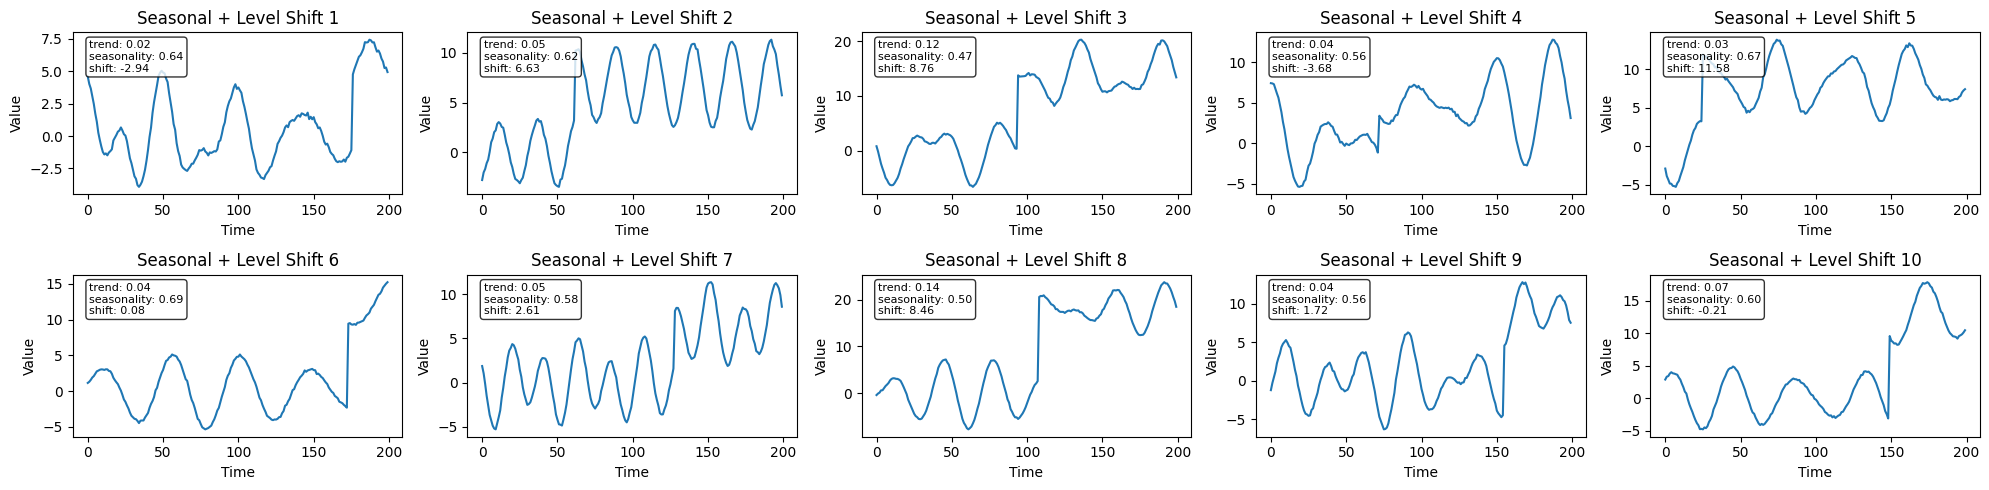

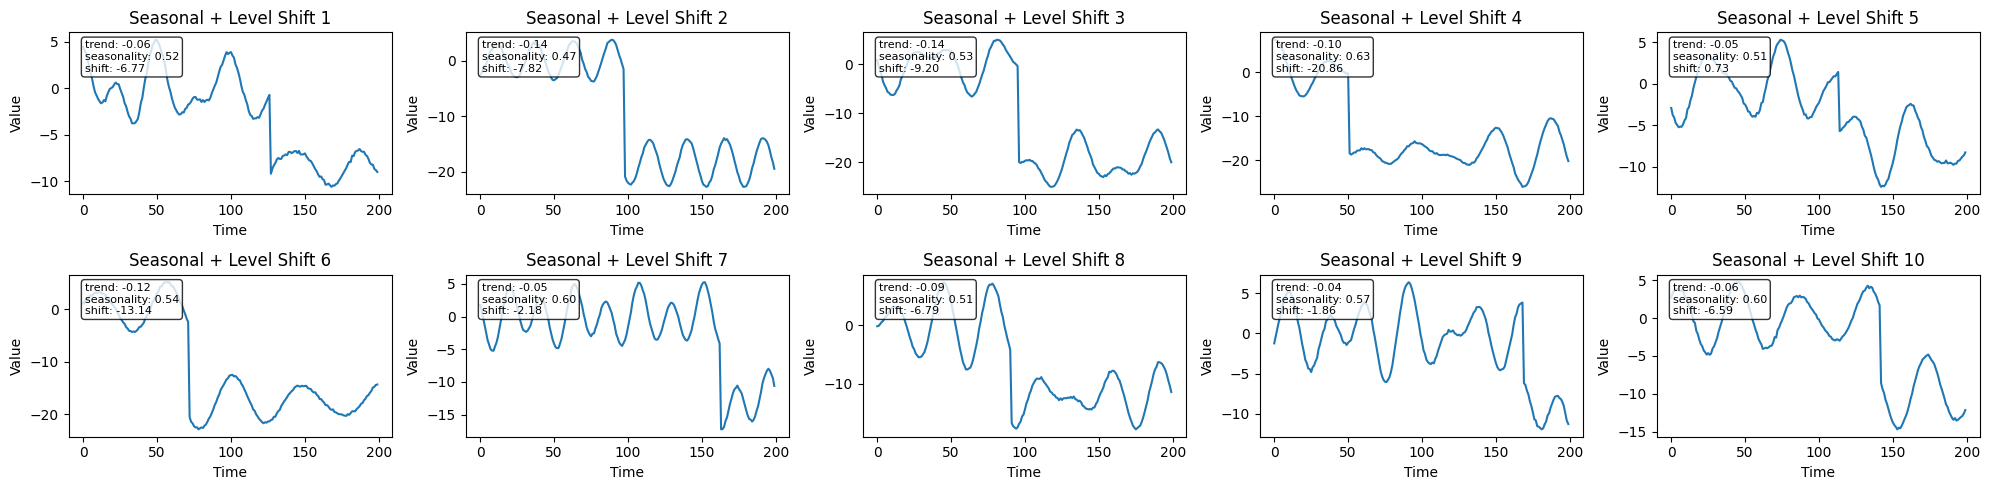

In [17]:

# Generate example series for each outlier type
n_series = 10  # Reduced number of series for better visualization
length = 200
w = 2

# Multiple seasonal patterns
multiple_series, multiple_descriptions = generate_seasonal_series(
    n_series, length, 'multiple')
# Level shift outliers
level_series_up, level_descriptions_up = generate_outlier_series(
    n_series, length, 'level_shift_up')
level_series_down, level_descriptions_down = generate_outlier_series(
    n_series, length, 'level_shift_down')


# Seasonal
plt.figure(figsize=(20, 5))
for i, (series, description) in enumerate(zip(multiple_series, multiple_descriptions)):
    plt.subplot(2, 5, i+1)
    plt.plot(series)
    scores = get_all_properties(series)
    score_text = f"trend: {scores['trend']:.2f}\nseasonality: {scores['seasonality']:.2f}\nshift: {scores['shift']:.2f}"
    plt.text(0.05, 0.95, score_text, transform=plt.gca().transAxes, 
             fontsize=8, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    plt.title(f'Seasonal {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    # plt.ylim(-10, 10)
    plt.tight_layout()
plt.show()

# Shift
plt.figure(figsize=(20, 5))
for i, (series, description) in enumerate(zip(level_series_up, level_descriptions_up)):
    plt.subplot(2, 5, i+1)
    plt.plot(series)
    scores = get_all_properties(series)
    score_text = f"trend: {scores['trend']:.2f}\nseasonality: {scores['seasonality']:.2f}\nshift: {scores['shift']:.2f}"
    plt.text(0.05, 0.95, score_text, transform=plt.gca().transAxes, 
             fontsize=8, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    plt.title(f'Level Shift {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    # plt.ylim(-10, 10)
    plt.tight_layout()
plt.show()

# Seasonal + Level Shift UP
plt.figure(figsize=(20, 5))
for i, (season, shift) in enumerate(zip(multiple_series, level_series_up)):
    series = season + w * shift
    plt.subplot(2, 5, i+1)
    plt.plot(series)
    scores = get_all_properties(series)
    score_text = f"trend: {scores['trend']:.2f}\nseasonality: {scores['seasonality']:.2f}\nshift: {scores['shift']:.2f}"
    plt.text(0.05, 0.95, score_text, transform=plt.gca().transAxes, 
             fontsize=8, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    plt.title(f'Seasonal + Level Shift {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    # plt.ylim(-10, 10)
    plt.tight_layout()
plt.show()

# Create a figure for the combined series
plt.figure(figsize=(20, 5))
for i, (season, shift) in enumerate(zip(multiple_series, level_series_down)):
    series = season + w * shift
    plt.subplot(2, 5, i+1)
    plt.plot(series)
    scores = get_all_properties(series)
    score_text = f"trend: {scores['trend']:.2f}\nseasonality: {scores['seasonality']:.2f}\nshift: {scores['shift']:.2f}"
    plt.text(0.05, 0.95, score_text, transform=plt.gca().transAxes, 
             fontsize=8, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    plt.title(f'Seasonal + Level Shift {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    # plt.ylim(-10, 10)
    plt.tight_layout()
plt.show()



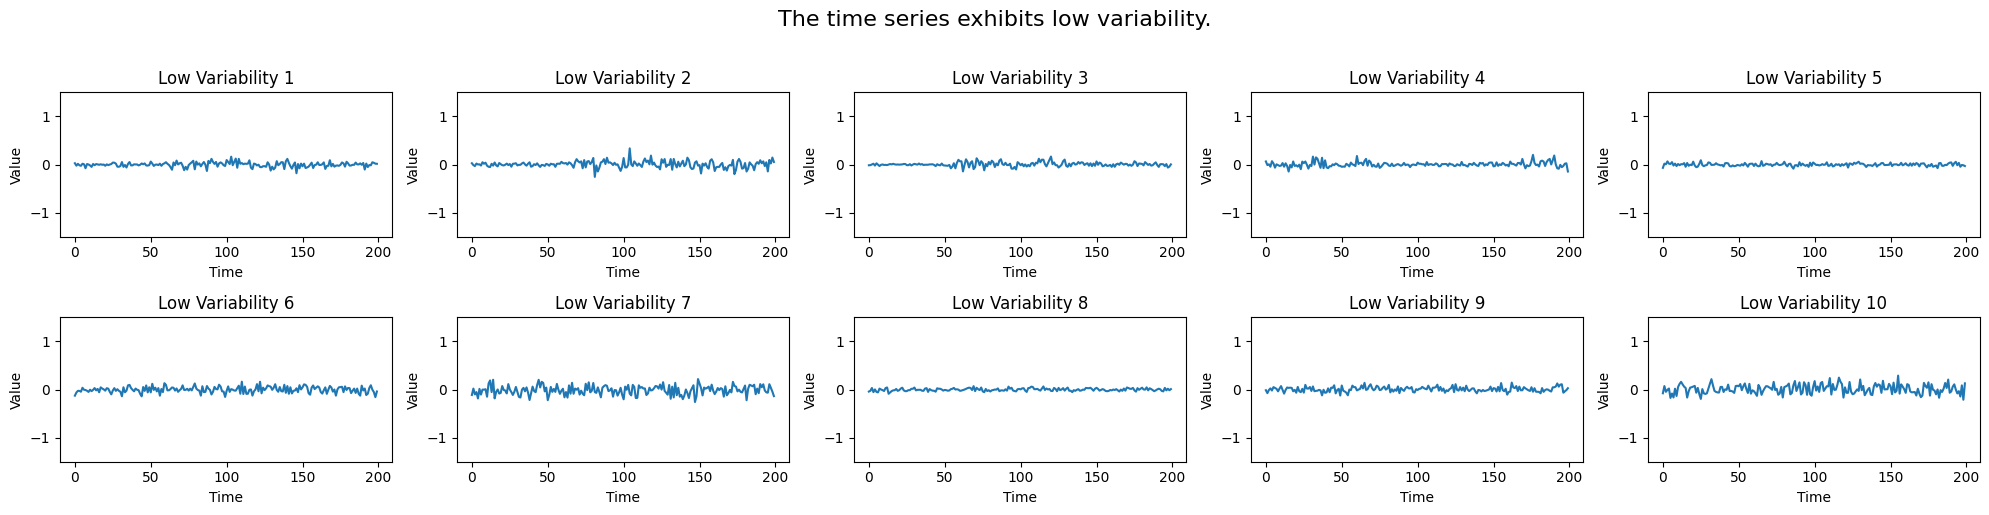

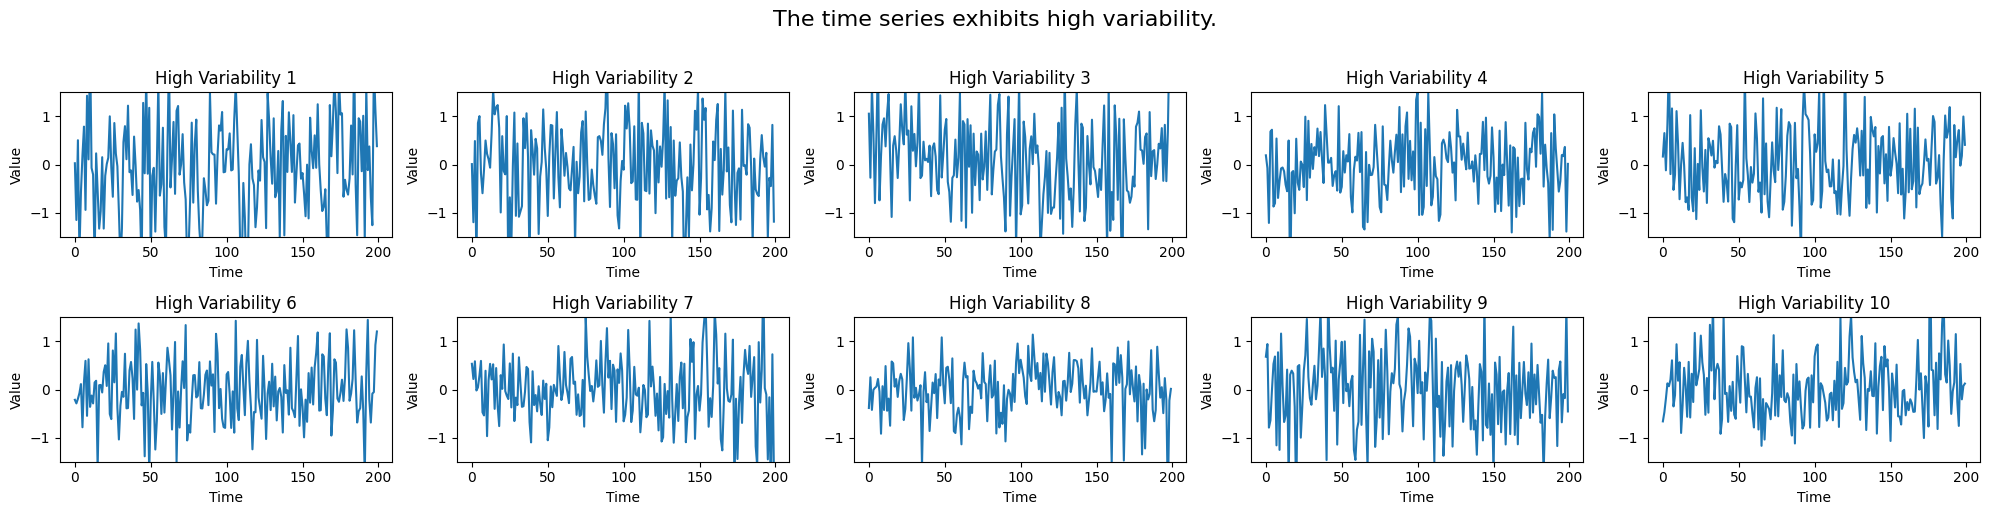

In [11]:
from variability import *

# Generate example series for each variability type
n_series = 10  # Number of series for visualization
length = 200

# Low variability
low_var_series, low_var_descriptions = generate_noise_series(
    n_series, length, 'low variability')

# High variability
high_var_series, high_var_descriptions = generate_noise_series(
    n_series, length, 'high variability')

# Create two separate figures for better visualization
# Figure 1: Low Variability
plt.figure(figsize=(20, 5))
plt.suptitle(low_var_descriptions[0], fontsize=16, y=1.02)

# Plot low variability patterns in a 2x5 grid
for i, (series, desc) in enumerate(zip(low_var_series, low_var_descriptions)):
    plt.subplot(2, 5, i+1)
    plt.plot(series)
    plt.title(f'Low Variability {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.ylim(-1.5, 1.5)  # Adjusted y-axis limits for better visualization
    plt.tight_layout()

plt.show()

# Figure 2: High Variability
plt.figure(figsize=(20, 5))
plt.suptitle(high_var_descriptions[0], fontsize=16, y=1.02)

# Plot high variability patterns in a 2x5 grid
for i, (series, desc) in enumerate(zip(high_var_series, high_var_descriptions)):
    plt.subplot(2, 5, i+1)
    plt.plot(series)
    plt.title(f'High Variability {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.ylim(-1.5, 1.5)  # Adjusted y-axis limits for better visualization
    plt.tight_layout()

plt.show()

In [12]:
import pandas as pd
from outlier import generate_outlier_series
from seasonality import generate_seasonal_series
from trend import generate_trend_series
from variability import generate_noise_series

# Parameters
n_samples = 10000
length = 200

# Initialize lists to store all data
all_series = []
all_descriptions = []
all_types = []

# Generate trend samples
trend_types = ['linear', 'quadratic', 'flat']
directions = ['up', 'down']
for trend_type in trend_types:
    if trend_type == 'flat':
        # Flat trends don't have direction
        series_list, description_list = generate_trend_series(
            n_samples, length, trend_type='flat')
        all_series.extend(series_list)
        all_descriptions.extend(description_list)
        all_types.extend(['trend_flat'] * n_samples)
    else:
        # Linear and quadratic trends have directions
        for direction in directions:
            series_list, description_list = generate_trend_series(
                n_samples, length, trend_type, direction)
            all_series.extend(series_list)
            all_descriptions.extend(description_list)
            all_types.extend([f'trend_{trend_type}_{direction}'] * n_samples)


# Generate seasonal samples
seasonal_types = ['no', 'single', 'multiple']
for seasonal_type in seasonal_types:
    series_list, description_list = generate_seasonal_series(
        n_samples, length, seasonal_type)
    all_series.extend(series_list)
    all_descriptions.extend(description_list)
    all_types.extend([f'seasonal_{seasonal_type}'] * n_samples)

# Generate outlier samples
outlier_types = ['no', 'spikes', 'step_spike_up', 'step_spike_down', 'level_shift_up', 'level_shift_down']
for outlier_type in outlier_types:
    series_list, description_list = generate_outlier_series(
        n_samples, length, outlier_type)
    all_series.extend(series_list)
    all_descriptions.extend(description_list)
    all_types.extend([f'outlier_{outlier_type}'] * n_samples)

# Generate noise samples
variability_types = ['low variability', 'high variability']
for variability_type in variability_types:
    series_list, description_list = generate_noise_series(
        n_samples, length, variability_type)
    all_series.extend(series_list)
    all_descriptions.extend(description_list)
    all_types.extend([f'variability_{variability_type}'] * n_samples)

# Convert to DataFrame
df = pd.DataFrame(all_series, columns=[str(i) for i in range(1, length+1)])
df['ts_description'] = all_descriptions
df['pattern_type'] = all_types

# Display summary
print(f"Generated {len(df)} samples")
print("\nPattern type counts:")
print(df['pattern_type'].value_counts())
print("\nFirst few rows:")
print(df.head())

# add a id column
df['id'] = range(1, len(df) + 1)
# Save to CSV
df.to_csv('../../data/synthetic/data.csv.zip', index=False, compression='zip')

Generated 160000 samples

Pattern type counts:
pattern_type
trend_linear_up                 10000
trend_linear_down               10000
trend_quadratic_up              10000
trend_quadratic_down            10000
trend_flat                      10000
seasonal_no                     10000
seasonal_single                 10000
seasonal_multiple               10000
outlier_no                      10000
outlier_spikes                  10000
outlier_step_spike_up           10000
outlier_step_spike_down         10000
outlier_level_shift_up          10000
outlier_level_shift_down        10000
variability_low variability     10000
variability_high variability    10000
Name: count, dtype: int64

First few rows:
           1          2          3          4          5          6  \
0 -16.015045 -15.844355 -15.673664 -15.502974 -15.332284 -15.161594   
1 -13.208040 -13.066374 -12.924709 -12.783043 -12.641378 -12.499712   
2  -3.482668  -3.410149  -3.337631  -3.265113  -3.192594  -3.120076   
3 -12

In [13]:
df[df['pattern_type'] == 'trend_flat']


,1,2,3,4,5,6,7,8,9,10,...,194,195,196,197,198,199,200,ts_description,pattern_type,id
40000,2.954288,2.954288,2.954288,2.954288,2.954288,2.954288,2.954288,2.954288,2.954288,2.954288,...,2.954288,2.954288,2.954288,2.954288,2.954288,2.954288,2.954288,No trend.,trend_flat,40001
40001,-4.099563,-4.099563,-4.099563,-4.099563,-4.099563,-4.099563,-4.099563,-4.099563,-4.099563,-4.099563,...,-4.099563,-4.099563,-4.099563,-4.099563,-4.099563,-4.099563,-4.099563,No trend.,trend_flat,40002
40002,-2.725062,-2.725062,-2.725062,-2.725062,-2.725062,-2.725062,-2.725062,-2.725062,-2.725062,-2.725062,...,-2.725062,-2.725062,-2.725062,-2.725062,-2.725062,-2.725062,-2.725062,No trend.,trend_flat,40003
40003,1.958438,1.958438,1.958438,1.958438,1.958438,1.958438,1.958438,1.958438,1.958438,1.958438,...,1.958438,1.958438,1.958438,1.958438,1.958438,1.958438,1.958438,No trend.,trend_flat,40004
40004,0.522244,0.522244,0.522244,0.522244,0.522244,0.522244,0.522244,0.522244,0.522244,0.522244,...,0.522244,0.522244,0.522244,0.522244,0.522244,0.522244,0.522244,No trend.,trend_flat,40005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.865556,1.865556,1.865556,1.865556,1.865556,1.865556,1.865556,1.865556,1.865556,1.865556,...,1.865556,1.865556,1.865556,1.865556,1.865556,1.865556,1.865556,No trend.,trend_flat,49996
49996,-0.662077,-0.662077,-0.662077,-0.662077,-0.662077,-0.662077,-0.662077,-0.662077,-0.662077,-0.662077,...,-0.662077,-0.662077,-0.662077,-0.662077,-0.662077,-0.662077,-0.662077,No trend.,trend_flat,49997
49997,2.483579,2.483579,2.483579,2.483579,2.483579,2.483579,2.483579,2.483579,2.483579,2.483579,...,2.483579,2.483579,2.483579,2.483579,2.483579,2.483579,2.483579,No trend.,trend_flat,49998
49998,-3.648978,-3.648978,-3.648978,-3.648978,-3.648978,-3.648978,-3.648978,-3.648978,-3.648978,-3.648978,...,-3.648978,-3.648978,-3.648978,-3.648978,-3.648978,-3.648978,-3.648978,No trend.,trend_flat,49999
